In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [2]:
data=pd.read_csv("retail_store_inventory_good.csv")

In [3]:
data.head()
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [4]:
enc=LabelEncoder()
data['Store ID']=enc.fit_transform(data['Store ID'])
data['Product ID']=enc.fit_transform(data['Product ID'])
data['Category']=enc.fit_transform(data['Category'])
data['Region']=enc.fit_transform(data['Region'])
data['Weather Condition']=enc.fit_transform(data['Weather Condition'])
data['Seasonality']=enc.fit_transform(data['Seasonality'])

In [5]:
data.head()


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,0,0,3,1,231,127,55,135.47,33.50,20,1,0,29.69,0
1,2022-01-01,0,1,4,2,204,150,66,144.04,63.01,20,3,0,66.16,0
2,2022-01-01,0,2,4,3,102,65,51,74.02,27.99,10,3,1,31.32,2
3,2022-01-01,0,3,4,1,469,61,164,62.18,32.72,10,0,1,34.74,0
4,2022-01-01,0,4,1,0,166,14,135,9.26,73.64,0,3,0,68.95,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  int64  
 2   Product ID          73100 non-null  int64  
 3   Category            73100 non-null  int64  
 4   Region              73100 non-null  int64  
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  int64  
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 8.4

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.drop(columns=['Store ID','Product ID','Date','Competitor Pricing','Units Ordered'],axis=1,inplace=True)

In [9]:
data.head()

,Category,Region,Inventory Level,Units Sold,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Seasonality
0,3,1,231,127,135.47,33.50,20,1,0,0
1,4,2,204,150,144.04,63.01,20,3,0,0
2,4,3,102,65,74.02,27.99,10,3,1,2
3,4,1,469,61,62.18,32.72,10,0,1,0
4,1,0,166,14,9.26,73.64,0,3,0,2


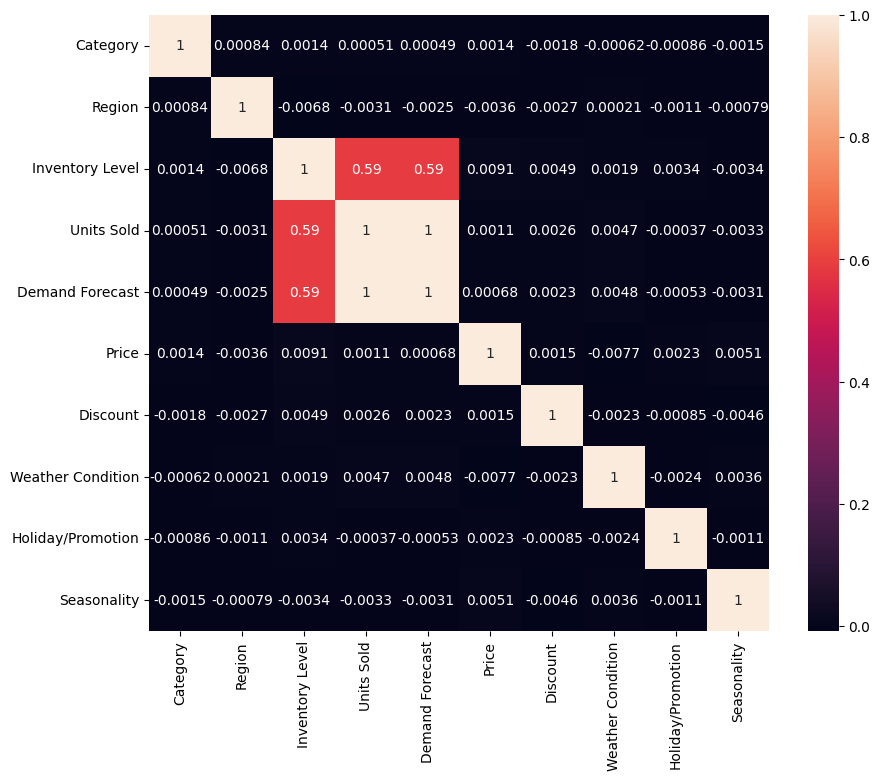

In [10]:
corr=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)
plt.show()

In [11]:
X=data.drop('Demand Forecast',axis=1)
y=data['Demand Forecast']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [14]:
modelRF  = RandomForestRegressor(n_estimators=100, random_state=42)
modelRF.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [15]:
modelRF.score(X_train,y_train)
modelRF.score(X_test,y_test)
y_predRF=modelRF.predict(X_test)

r2_score: 0.9931849440150016
mean_square_error: 81.23198605238714
mean_absolute_error: 7.689004979480163


Text(0.5, 1.0, 'Actual vs Predicted Values (Random Forest)')

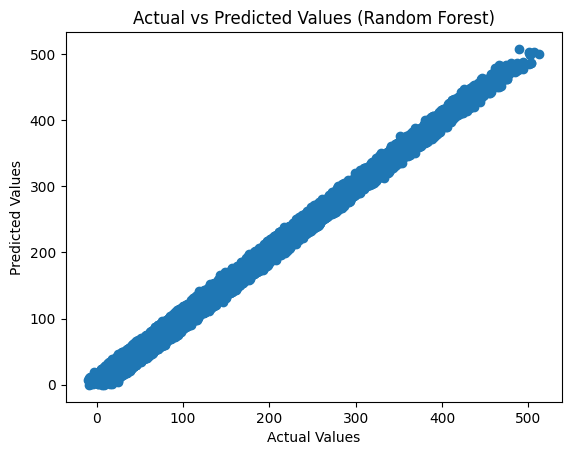

In [ ]:
print('r2_score:',r2_score(y_predRF,y_test))
print('mean_square_error:',mean_squared_error(y_predRF,y_test))
print('mean_absolute_error:',mean_absolute_error(y_predRF,y_test))
plt.scatter(y_test,y_predRF)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')


In [17]:
tmp_data = [[3,1,225,125,35,19,1,0,0]]
#Category,Region,Inventory Level,Units Sold,Price,Discount,Weather Condition,Holiday/Promotion,Seasonality
tmp_data = scaler.fit_transform(tmp_data)
tmp_pred = modelRF.predict(tmp_data)
print('Predicted Demand Forecast:', tmp_pred[0])

Predicted Demand Forecast: 143.45049999999998


In [18]:
modelLR = LinearRegression()
modelLR.fit(X_train,y_train)

LinearRegression()

In [19]:
modelLR.score(X_train,y_train)
modelLR.score(X_test,y_test)
y_predLR=modelLR.predict(X_test)

r2_score: 0.9935293003549555
mean_square_error: 76.77355642260137
mean_absolute_error: 7.543435884999714


Text(0.5, 1.0, 'Actual vs Predicted Values (Linear Regression)')

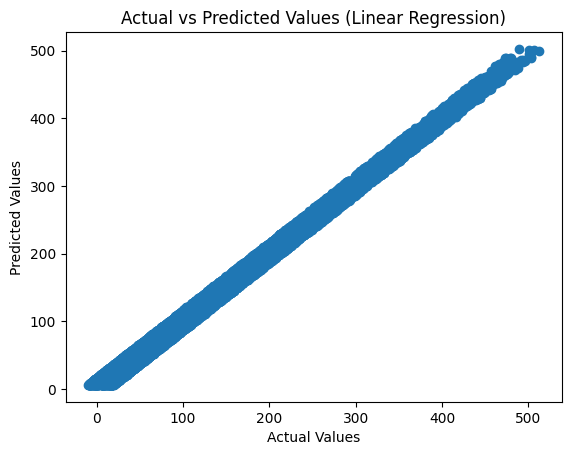

In [22]:
print('r2_score:',r2_score(y_predLR,y_test))
print('mean_square_error:',mean_squared_error(y_predLR,y_test))
print('mean_absolute_error:',mean_absolute_error(y_predLR,y_test))
plt.scatter(y_test,y_predLR)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')